<h3 align="center">Практическая работа №2. Применение однослойной нейронной сети для решения задач регрессии экспериментальных данных</h3>

### Цель работы

Цель работы — изучить возможности однослойных НС с правилом обучения Видроу — Хоффа в задачах регрессии экспериментальных данных.

### Постановка задачи.

Постановка задачи. В зависимости от варианта работы с помощью НС с линейной функцией активации аппроксимировать функцию $f(х)$ (найти коэффициенты $с, d$) по набору ее $N$ дискретных значений, заданных равномерно на интервале $[a,b]$ со случайными ошибками $e_i=A     rnd(−0,5; 0,5)$. Выполнить расчет параметров $с, d$ методом наименьших квадратов (МНК) и определить среднеквадратичное отклонение (СКО). Провести обучение НС по правилу Видроу — Хоффа, экспериментальным путем подобрав оптимальный коэффициент обучения

## 8 вариант
Параметры:

$a = -1$

$b = 3$

$c = 3.0$

$d = 1.0$

$N = 16$

$F = c x^2 + d$

In [1]:
from services import *
from variants import *
import numpy as np
from copy import copy
import matplotlib.pyplot as plt


***
### 1. Решение задачи регрессии через МНК. Параметр шума отсутствует, ошибка нулевая

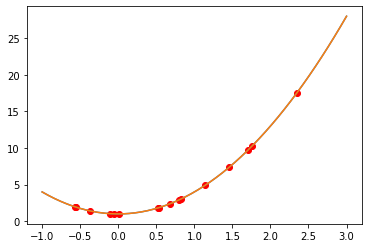

In [2]:
a = -1
b = 3
c = 3.0
d = 1.0
N = 16

x_points = np.random.uniform(low=a, high=b, size=N)
y_points = c * x_points ** 2 + d
_c, _d = mnk(list(zip([x ** 2 for x in x_points], y_points)))

true_x = np.linspace(a, b)
true_y = c * true_x ** 2 + d

mnk_x = np.linspace(a, b)
mnk_y = _c * mnk_x ** 2 + _d

plt.plot(true_x, true_y)
plt.scatter(x_points, y_points, c='red')

plt.plot(mnk_x, mnk_y)


***
### 2. Решение задачи регрессии через обучение нейрона. Количество эпох - 100, норма обучения - 0,0005. Параметр шума отсутствует

Среднеквадратичная ошибка: 1.1010699250988694


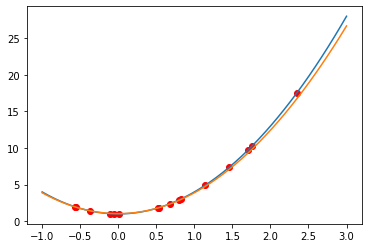

In [3]:
nn = NeuralNetwork(learning_rate=0.0005, activation_function=af)
epochs = 100

for i in range(epochs):
    nn.epoch(input_data=[x ** 2 for x in x_points], expected_output_data=y_points)

nn_x = np.linspace(a, b)
nn_y = nn.c * nn_x ** 2 + nn.d
true_x = np.linspace(a, b)
true_y = c * true_x ** 2 + d
plt.plot(true_x, true_y)
plt.plot(nn_x, nn_y)
plt.scatter(x_points, y_points, c='red')

print(f"Среднеквадратичная ошибка: {sum([e ** 2 for e in [(c * x ** 2 + d) - (nn.c * x ** 2 + nn.d) for x in x_points]])}")

***
### 3. Решение задачи регрессии через МНК. Параметр шума - 3

Среднеквадратичная ошибка: 4.344249255818599


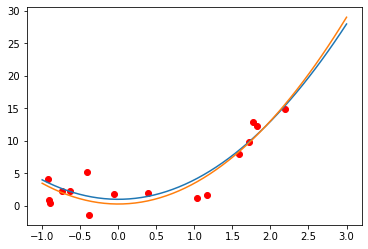

In [13]:
A = 3

x_points = np.random.uniform(low=a, high=b, size=N)
rA = np.random.normal(scale=A, size=x_points.size)
y_points = c * x_points ** 2 + d + rA / 2
_c, _d = mnk(list(zip([x ** 2 for x in x_points], y_points)))

true_x = np.linspace(a, b)
true_y = c * true_x ** 2 + d

mnk_x = np.linspace(a, b)
mnk_y = _c * mnk_x ** 2 + _d

plt.plot(true_x, true_y)
plt.scatter(x_points, y_points, c='red')

plt.plot(mnk_x, mnk_y)

print(f"Среднеквадратичная ошибка: {sum([e ** 2 for e in [(c * x ** 2 + d) - (_c * x ** 2 + _d) for x in x_points]])}")

***
### 4. Решение задачи регрессии через обучение нейрона. Количество эпох - 100, норма обучения - 0,0005. Параметр шума - 3

Среднеквадратичная ошибка: 1.879848892051982


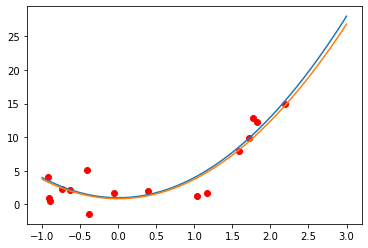

In [14]:
nn = NeuralNetwork(learning_rate=0.0005, activation_function=af)
epochs = 100

for i in range(epochs):
    nn.epoch(input_data=[x ** 2 for x in x_points], expected_output_data=y_points)

nn_x = np.linspace(a, b)
nn_y = nn.c * nn_x ** 2 + nn.d
true_x = np.linspace(a, b)
true_y = c * true_x ** 2 + d
plt.plot(true_x, true_y)
plt.plot(nn_x, nn_y)
plt.scatter(x_points, y_points, c='red')

print(f"Среднеквадратичная ошибка: {sum([e ** 2 for e in [(c * x ** 2 + d) - (nn.c * x ** 2 + nn.d) for x in x_points]])}")

***
## Выводы

В результате проведения работы было исследовано функционирование однослойной НС с правилом обучения Видроу — Хоффа в задачах регрессии экспериментальных данных. Было проведено сравнение данного метода с методом наименьших квадратов

***

## Контрольные вопросы
**1. Объясните понятие регрессии экспериментальных данных.**

Одномерная (простая) линейная регрессия – это метод, используемый для моделирования отношений между одной независимой входной переменной (переменной функции) и выходной зависимой переменной. Модель линейная.
Более общий случай – множественная линейная регрессия, где создаётся модель взаимосвязи между несколькими входными переменными и выходной зависимой переменной. Модель остаётся линейной, поскольку выходное значение представляет собой линейную комбинацию входных значений.
Также стоит упомянуть полиномиальную регрессию. Модель становится нелинейной комбинацией входных переменных, т. е. среди них могут быть экспоненциальные переменные: синус, косинус и т. п.

**2. Поясните суть метода наименьших квадратов.**

Задача заключается в нахождении коэффициентов линейной зависимости, при которых функция двух переменных $а$ и $b$ функция двух переменных
$$
F(a,b) = \sum_{i=1}^{n} (y_i - (a x_i + b))^2
$$
принимает наименьшее значение. То есть, при данных а и b сумма квадратов отклонений экспериментальных данных от найденной прямой будет наименьшей. Таким образом, решение сводится к нахождению экстремума функции двух переменных.


**3. Сформулируйте нейросетевой подход к задачам регрессии.**

МНК дает уравнение прямой, наилучшим образом аппроксимирующей набор данных. Для нахождения такой прямой можно применить другой подход, основанный на использовании НС с линейной функцией активации и обучении, т. е. настройке ее весов $с, d$ по некоторой выборке. Поскольку сеть однослойная, обучение можно реализовать по правилу Видроу — Хоффа.

Каждая эпоха обучения $k = 1,2,...$ включает в себя цикл последовательного предъявления всех образцов обучающей выборки $i=1,N$ на вход НС. Предъявление одного обучающего образца внутри эпохи является элементарным шагом обучения, во время которого вектор весовых коэффициентов $w = (c, d)$ корректируется согласно правилу Видроу — Хоффа: 
$$ \hat{c}_{i+1} = \hat{c}_i + \Delta \hat{c}_𝑖, \Delta \hat{c}_i=\eta \sigma_i x_i, $$
$$ \hat{d}_{i+1} = \hat{d}_i + \Delta \hat{d}_𝑖, \Delta \hat{d}_i=\eta \sigma_i, $$

где $\eta$ — норма обучения, $\eta \in (0,1]$.

***
<h5 style="text-align: right;">Выполнил студент группы М112101 Ромашин Денис</h5>